![alt text](https://github.com/BITalinoWorld/python-lab-guides/raw/master/BITalino%20Hands-on/images/bitalinobar.jpg)

# 0.Biosignal Processing


---


In this notebook we will look to biosignal files, that can be acquired with BITalino or similar devices, or even extracted from public datasets.   

To process biosignals, we can use the BioSPPy toolbox: https://github.com/PIA-Group/BioSPPy

In this exercise we will use python and cover:


* Data Loading

* Data Visualization
  
* Filtering

* Feature Extraction

![alt text](https://github.com/BITalinoWorld/python-lab-guides/raw/master/BITalino%20Hands-on/images/bitalinobar.jpg)

# 1.Data Loading


---

Biosignals data is usually in the following formats:

* txt 
  * https://www.geeksforgeeks.org/reading-writing-text-files-python/
* csv 
  * https://realpython.com/python-csv/
* hdf5
  * https://stackoverflow.com/questions/28170623/how-to-read-hdf5-files-in-python
  


## 1.1.Import libraries

In [0]:
#In this line we are installing in our virtual machine useful packages for the next steps. 
# the command ">/dev/null 2>&1" is only hiding the internal steps being taken
!git clone https://github.com/PIA-Group/BioSPPy.git >/dev/null 2>&1 
!pip install pandas >/dev/null 2>&1 
!pip install numpy >/dev/null 2>&1
!pip install matplotlib >/dev/null 2>&1
!pip install seaborn >/dev/null 2>&1
!pip install biosppy >/dev/null 2>&1

In [0]:
import numpy as np #NumPy is the fundamental package for scientific computing with Python. 

import matplotlib.pyplot as plt #Matplotlib is a Python 2D plotting library

import biosppy as bp #A toolbox for biosignal processing written in Python.

from pylab import *

import os #The OS module in Python provides a way of using operating system dependent functionality.

## 1.2.Load data files



In [0]:
path = 'BioSPPy/examples/' #choose path directory where data is located

dir = os.listdir(path) #show all files in directory

print(dir) 

data = {} #create a dictionary where each signal will be a different entry

for file in dir: #run all files in directory
  
  type = file[:-4] #since file is a string containing ".txt", we will use as a dictionary key the entire name up to ".txt"
  data[type] = [] #create a new entry on the dictionary for that type of signal
  data[type] = loadtxt(path+file) #load the file for that particular entry
  
print(data)

['resp.txt', 'emg.txt', 'ecg.txt', 'bvp.txt', 'eda.txt', 'emg_1.txt']
{'resp': array([2094., 2094., 2095., ..., 1404., 1403., 1401.]), 'emg': array([2055., 2056., 2055., ..., 2055., 2054., 2057.]), 'ecg': array([2044., 2044., 2044., ..., 2044., 2045., 2043.]), 'bvp': array([2065., 2066., 2066., ..., 2056., 2057., 2060.]), 'eda': array([2669., 2671., 2677., ..., 2495., 2491., 2491.]), 'emg_1': array([2034., 2011., 2004., ..., 2043., 2051., 2035.])}


![alt text](https://github.com/BITalinoWorld/python-lab-guides/raw/master/BITalino%20Hands-on/images/bitalinobar.jpg)

# 2.Data Visualization

For visualization we will use the library [matplotlib](https://matplotlib.org/) 

Here we will plot the signals present in data.

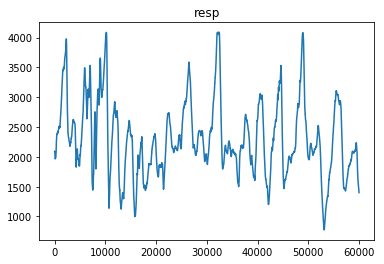

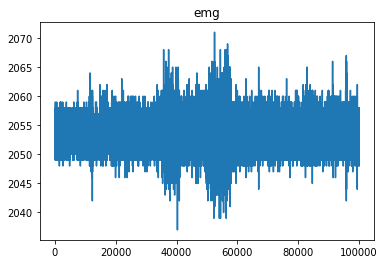

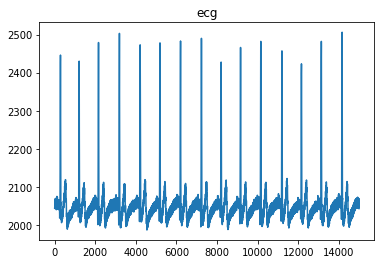

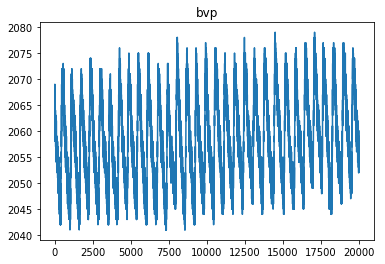

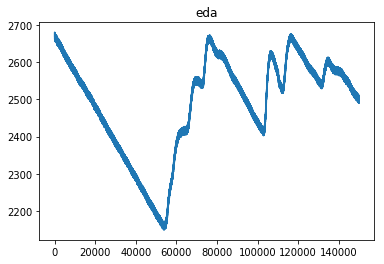

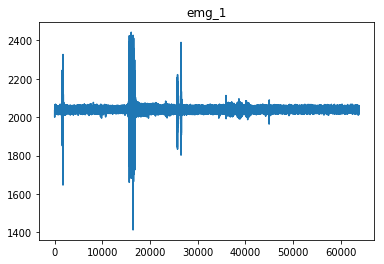

In [0]:
#sb.set()
%matplotlib inline


for type in data.keys():
  plt.title(type)
  plt.plot(data[type])
  plt.savefig(type)
  plt.show()


## 2.2. Compute Power Spectrum

Power spectrum is the signal's representation in terms of frequency, instead of time. It shows all the frequencies that compose the signal. A time series signal contain

In [0]:
fft = {}
for key in data.keys():
  fft[key] =  []
  fft[key] = bp.signals.tools.welch_spectrum(data[key])


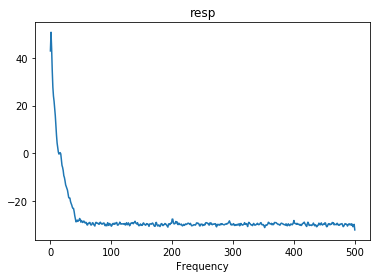

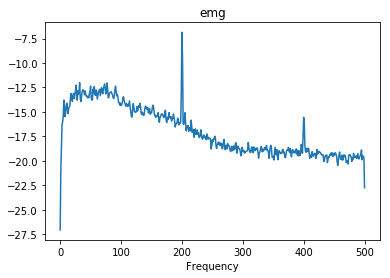

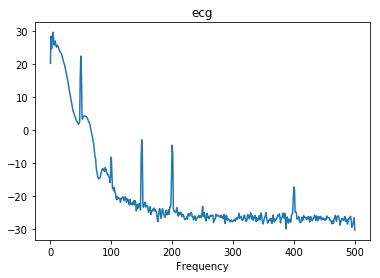

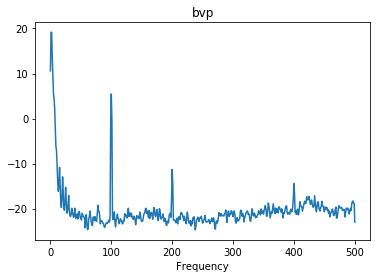

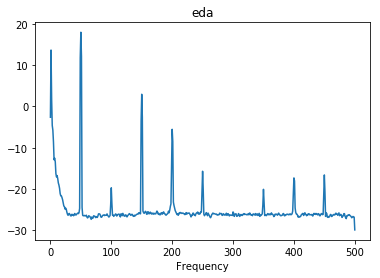

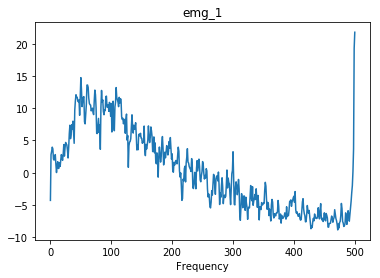

In [0]:
for key in fft.keys():
  plt.title(key)
  plt.plot(fft[key]['freqs'],fft[key]['power'])
  plt.xlabel('Frequency')
  plt.savefig(key+'power')
  plt.show()

![alt text](https://github.com/BITalinoWorld/python-lab-guides/raw/master/BITalino%20Hands-on/images/bitalinobar.jpg)

# 3.Filtering

Raw data might contain noise or unusual fluctuations. Each biosignal is associated to a specific frequency range, and everything outside that range can be removed without damaging the signal. The removal of unwanted frequencies is called filtering. Note that this does not alter the signal duration, it only cleans bad frequencies.


## 2.1.Types of filters

Filter is a function applied to the signal's spectrum, which will attenuate the signal in the range specified. Different types of filters correspond to different functions, however the behaviour is similar (attenuation).

![alt_text](https://i.stack.imgur.com/JS65H.jpg)

Filters can be: 
 * low-pass -- attenuates higher than cutoff frequency
 * high-pass -- attenuates lower than cutoff frequency
 * bandpass -- attenuates outside the cutoff frequencies

In [0]:
filt = {}
sampling_rate=1000

filt['ecg'] = bp.signals.tools.filter_signal(signal=data['ecg'],
                                      ftype='FIR',
                                      band='bandpass',
                                      order=300,
                                      frequency=[3, 45],
                                      sampling_rate=sampling_rate)
filt['eda'] = bp.signals.tools.filter_signal(signal=data['eda'],
                                 ftype='butter',
                                 band='lowpass',
                                 order=4,
                                 frequency=5,
                                 sampling_rate=sampling_rate)
filt['emg'] = bp.signals.tools.filter_signal(signal=data['emg'],
                                      ftype='butter',
                                      band='highpass',
                                      order=4,
                                      frequency=100,
                                      sampling_rate=sampling_rate)
filt['emg_1'] = bp.signals.tools.filter_signal(signal=data['emg_1'],
                                      ftype='butter',
                                      band='highpass',
                                      order=4,
                                      frequency=100,
                                      sampling_rate=sampling_rate)
filt['resp'] = bp.signals.tools.filter_signal(signal=data['resp'],
                                      ftype='butter',
                                      band='bandpass',
                                      order=2,
                                      frequency=[0.1, 0.35],
                                      sampling_rate=sampling_rate)
filt['bvp'] = bp.signals.tools.filter_signal(signal=data['bvp'],
                                      ftype='butter',
                                      band='bandpass',
                                      order=4,
                                      frequency=[1, 8],
                                      sampling_rate=sampling_rate)

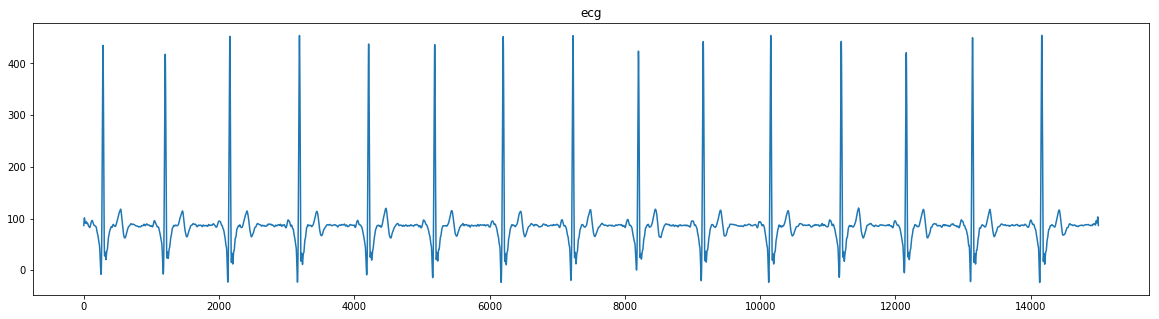

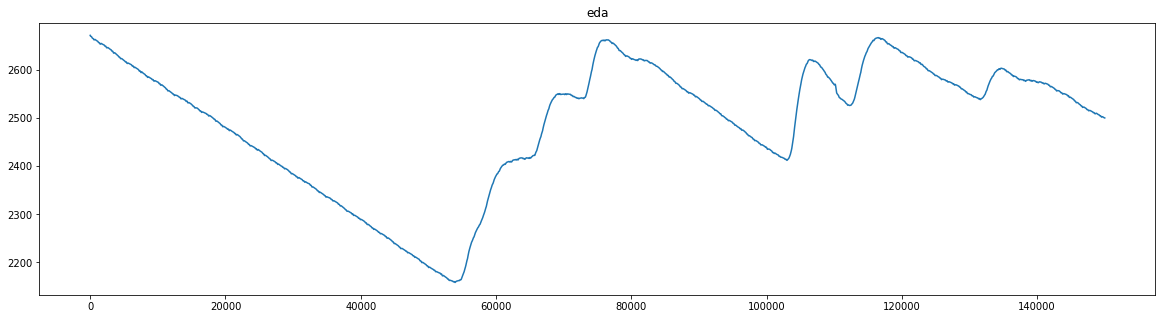

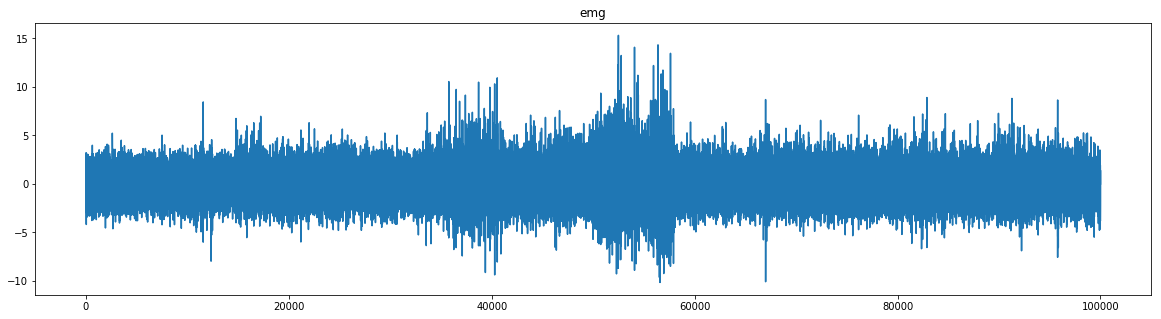

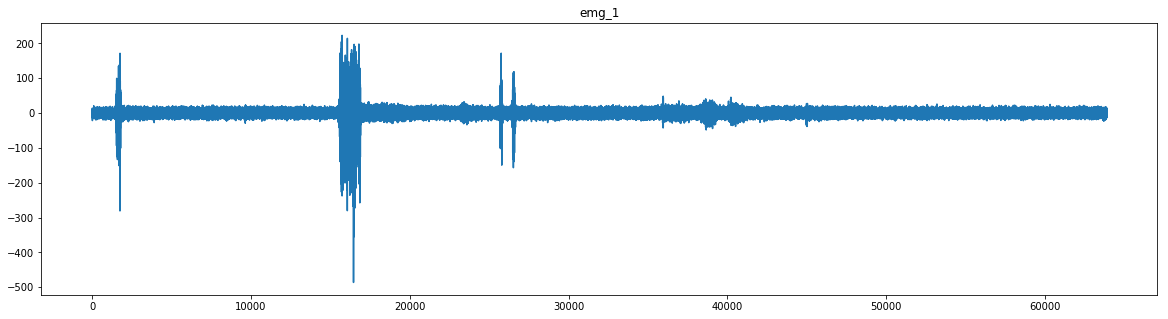

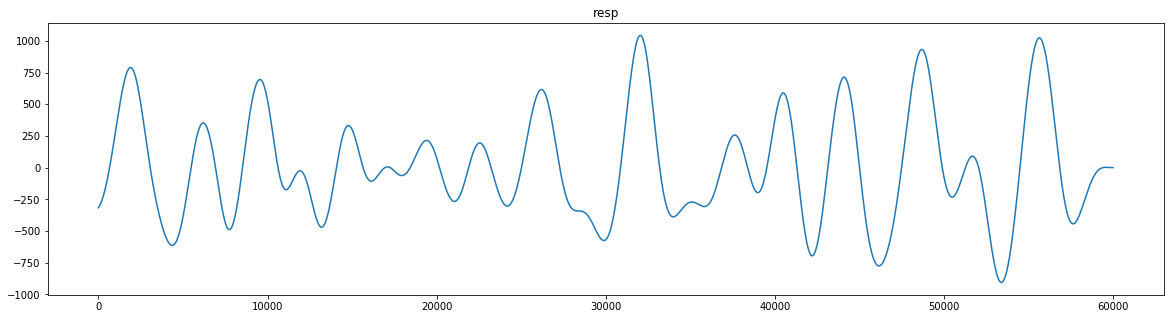

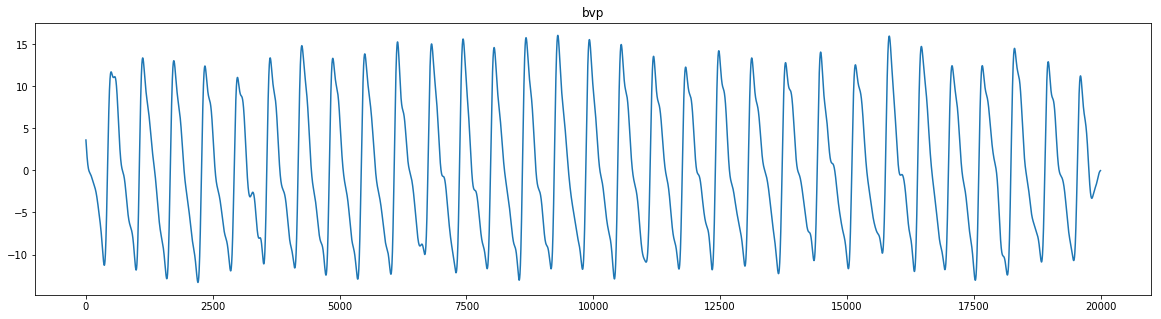

In [0]:
for key in filt.keys():
  plt.figure(figsize=(20,5))
  plt.title(key)
  plt.plot(filt[key]['signal'])
  plt.savefig(key)
  
  plt.show()

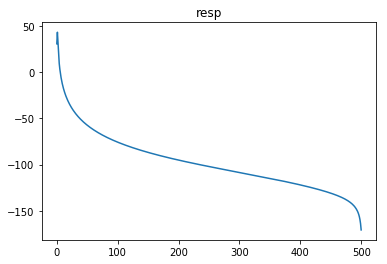

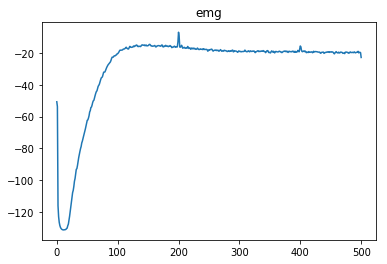

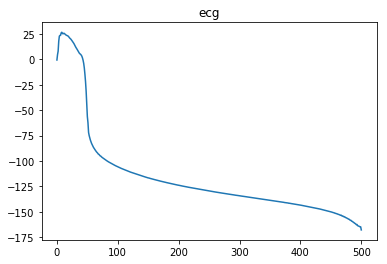

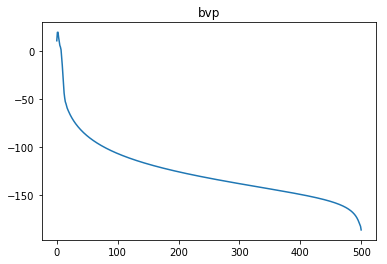

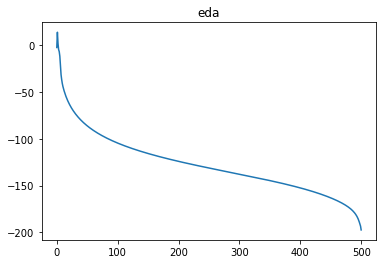

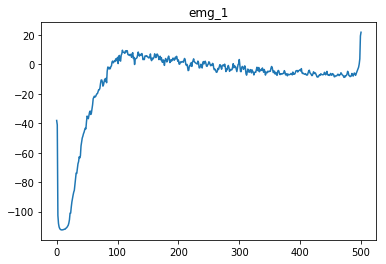

In [0]:
fft_filt = {}
for key in data.keys():
  fft_filt[key] =  []
  plt.title(key)
  fft_filt[key] = bp.signals.tools.welch_spectrum(filt[key]['signal'])
  plt.plot(fft_filt[key]['freqs'],fft_filt[key]['power'])
  plt.show()

![alt text](https://github.com/BITalinoWorld/python-lab-guides/raw/master/BITalino%20Hands-on/images/bitalinobar.jpg)

# 4. Feature Extraction

What information can we retrieve from the signal? Besides its evolution through time, signals can be represented by other information, such as their spectrum or even some easy metrics. A particular signal can be evaluated in terms of their mean, max and minimum amplitudes, variance, amongst other metrics. 

With function **signal_stats** from biosppy/signals/tools.py, we automatically calculate simple metrics from any signal.

In [0]:
features = {}

for key in data.keys():
  features[key] = bp.signals.tools.signal_stats(filt[key]['signal'])

In [0]:
features

{'bvp': ReturnTuple(mean=-0.00780368841345346, median=-1.0693363716244637, max=16.078163478056315, var=63.49237780472826, std_dev=7.968210451834731, abs_dev=135919.87188089933, kurtosis=-1.1741920455100485, skewness=0.24283481280583213),
 'ecg': ReturnTuple(mean=87.04461828367282, median=86.35046872770495, max=367.3952459558121, var=2329.1305261254615, std_dev=48.26106635918296, abs_dev=268454.4158126264, kurtosis=29.208182573315753, skewness=4.674391607640997),
 'eda': ReturnTuple(mean=2490.736345075769, median=2537.9900760107357, max=332.29080100525607, var=17690.259488987045, std_dev=133.00473483672317, abs_dev=15479853.41916189, kurtosis=-0.1771208108813611, skewness=-0.8917956851682929),
 'emg': ReturnTuple(mean=7.523696857984099e-06, median=-0.003636279807023024, max=15.322734941725326, var=2.3526122491164836, std_dev=1.5338227567474945, abs_dev=117745.22062328094, kurtosis=2.1158881469475883, skewness=0.17797435256949737),
 'emg_1': ReturnTuple(mean=2.3779786947466336e-06, media